In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9640,-120.85,37.07,16.0,1795.0,362.0,1642.0,340.0,2.5363,INLAND,86300.0
10853,-117.90,33.69,13.0,9947.0,1675.0,4071.0,1582.0,5.4220,<1H OCEAN,316600.0
17276,-119.69,34.41,44.0,1208.0,357.0,603.0,297.0,2.6103,<1H OCEAN,500000.0
2206,-119.88,36.83,2.0,4055.0,735.0,1730.0,654.0,4.2132,INLAND,96500.0
1385,-122.11,37.99,10.0,2864.0,514.0,1300.0,507.0,4.3875,NEAR BAY,287700.0
...,...,...,...,...,...,...,...,...,...,...
903,-121.98,37.53,26.0,3179.0,703.0,2142.0,639.0,4.1947,<1H OCEAN,222700.0
8135,-118.13,33.82,44.0,1619.0,280.0,815.0,284.0,5.5449,<1H OCEAN,232200.0
6008,-117.76,34.07,48.0,1157.0,247.0,677.0,218.0,2.8594,INLAND,127200.0
3218,-119.68,36.32,26.0,592.0,121.0,268.0,116.0,1.7596,INLAND,120800.0


In [13]:
train_data_without_op = train_data.drop(['ocean_proximity'], axis = 1)

In [14]:
train_data_without_op

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9640,-120.85,37.07,16.0,1795.0,362.0,1642.0,340.0,2.5363,86300.0
10853,-117.90,33.69,13.0,9947.0,1675.0,4071.0,1582.0,5.4220,316600.0
17276,-119.69,34.41,44.0,1208.0,357.0,603.0,297.0,2.6103,500000.0
2206,-119.88,36.83,2.0,4055.0,735.0,1730.0,654.0,4.2132,96500.0
1385,-122.11,37.99,10.0,2864.0,514.0,1300.0,507.0,4.3875,287700.0
...,...,...,...,...,...,...,...,...,...
903,-121.98,37.53,26.0,3179.0,703.0,2142.0,639.0,4.1947,222700.0
8135,-118.13,33.82,44.0,1619.0,280.0,815.0,284.0,5.5449,232200.0
6008,-117.76,34.07,48.0,1157.0,247.0,677.0,218.0,2.8594,127200.0
3218,-119.68,36.32,26.0,592.0,121.0,268.0,116.0,1.7596,120800.0


In [15]:
count_zeros = (train_data_without_op == 0).sum()
print(count_zeros)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [16]:
train_data_without_op.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924663,-0.110681,0.040849,0.065453,0.097156,0.051405,-0.020227,-0.052342
latitude,-0.924663,1.000000,0.011062,-0.031840,-0.062495,-0.106003,-0.066934,-0.074865,-0.138854
housing_median_age,-0.110681,0.011062,1.000000,-0.359569,-0.318106,-0.299051,-0.300190,-0.120981,0.105510
total_rooms,0.040849,-0.031840,-0.359569,1.000000,0.928759,0.862457,0.917642,0.200598,0.135541
total_bedrooms,0.065453,-0.062495,-0.318106,0.928759,1.000000,0.882589,0.979256,-0.006708,0.051789
population,0.097156,-0.106003,-0.299051,0.862457,0.882589,1.000000,0.911739,0.006522,-0.025246
households,0.051405,-0.066934,-0.300190,0.917642,0.979256,0.911739,1.000000,0.014593,0.067342
median_income,-0.020227,-0.074865,-0.120981,0.200598,-0.006708,0.006522,0.014593,1.000000,0.686062
median_house_value,-0.052342,-0.138854,0.105510,0.135541,0.051789,-0.025246,0.067342,0.686062,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

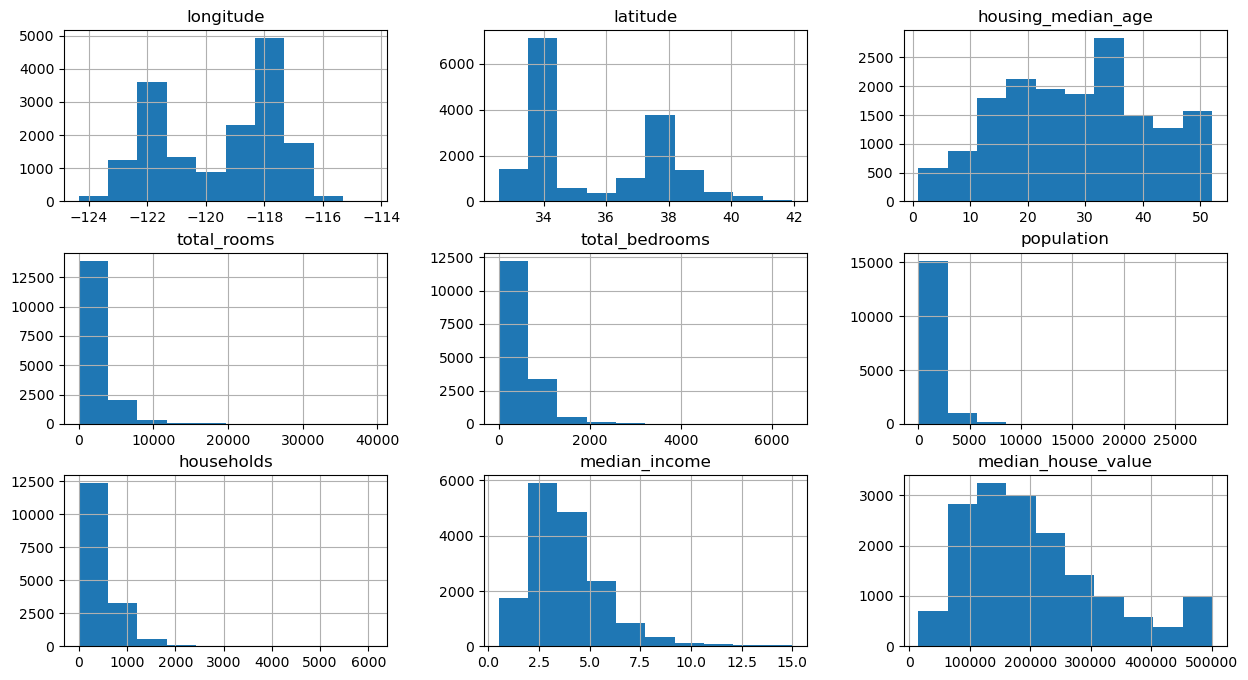

In [17]:
train_data_without_op.hist(figsize = (15, 8))

<Axes: >

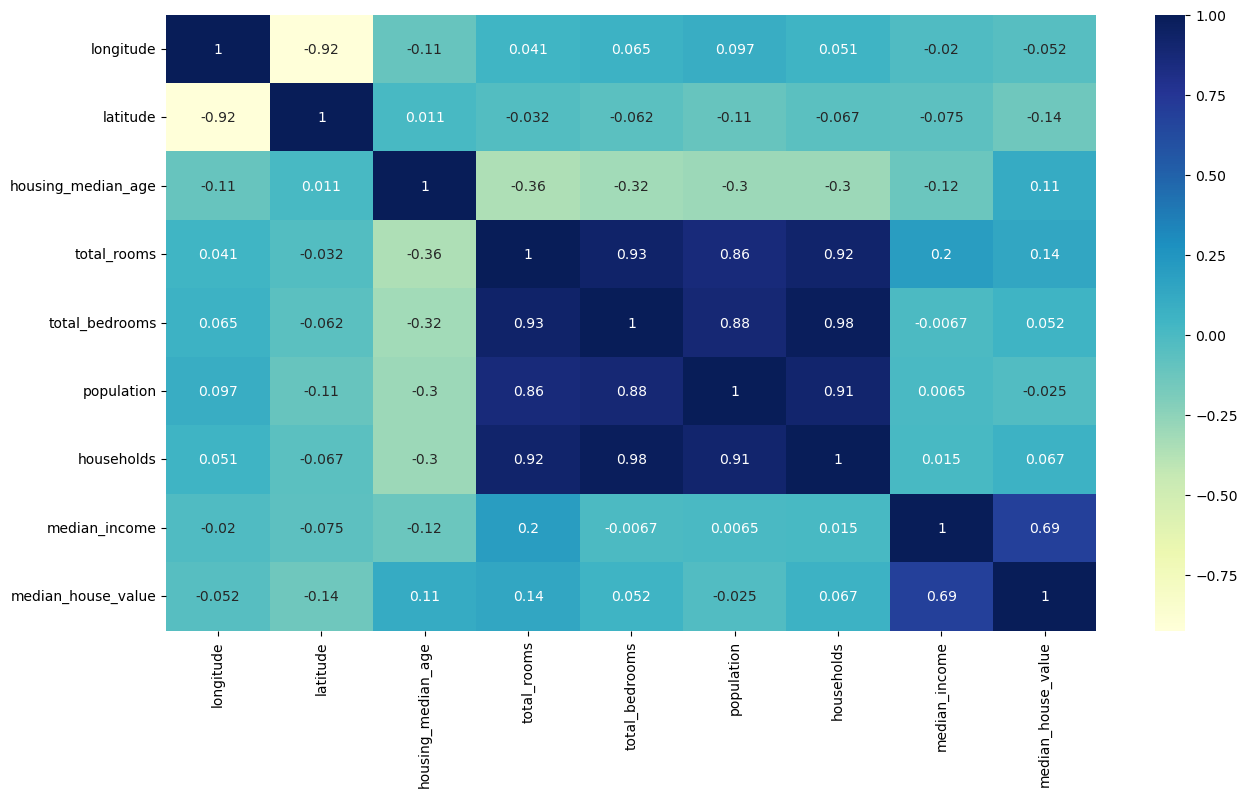

In [18]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data_without_op.corr(), annot = True, cmap = "YlGnBu")

In [19]:
transformed_households, lambda_value1 = boxcox(train_data_without_op['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(train_data_without_op['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(train_data_without_op['population'])
transformed_totalrooms, lambda_value4 = boxcox(train_data_without_op['total_rooms'])

In [20]:
train_data_without_op['households'] = transformed_households
train_data_without_op['total_bedrooms'] = transformed_totalsbedrooms
train_data_without_op['total_rooms'] = transformed_totalrooms
train_data_without_op['population'] = transformed_population

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

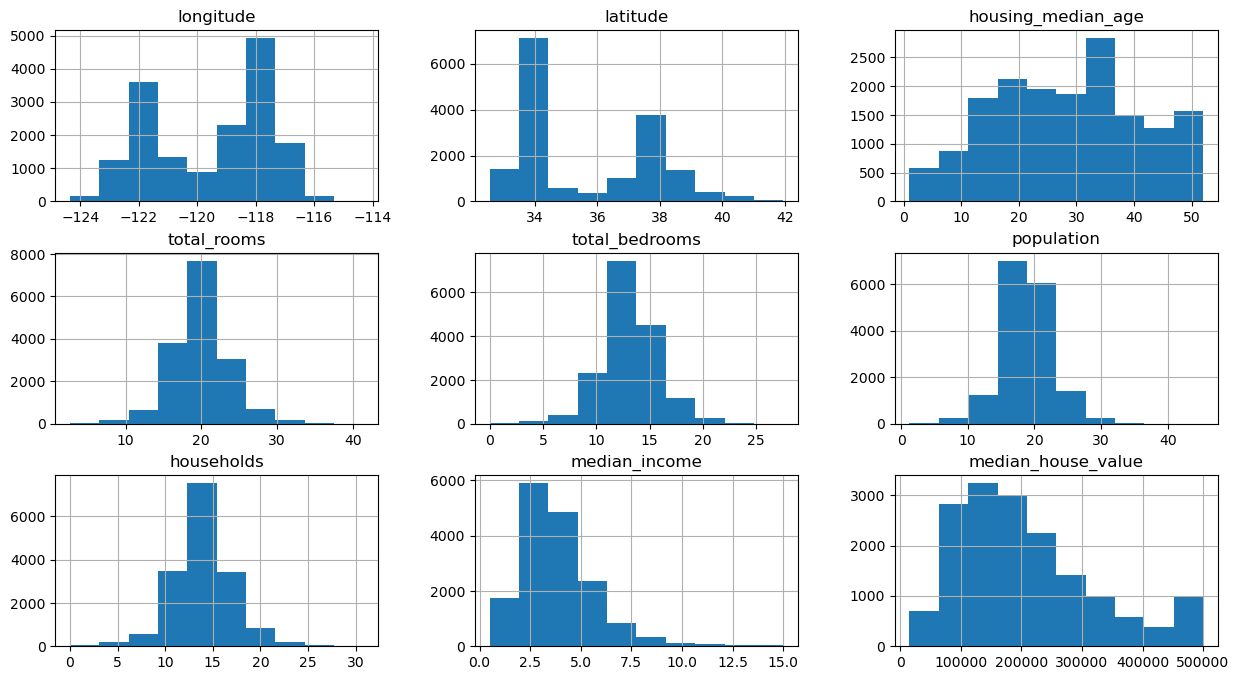

In [21]:
train_data_without_op.hist(figsize = (15, 8))

# Start preprocess

In [22]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9640,False,True,False,False,False
10853,True,False,False,False,False
17276,True,False,False,False,False
2206,False,True,False,False,False
1385,False,False,False,True,False
...,...,...,...,...,...
903,True,False,False,False,False
8135,True,False,False,False,False
6008,False,True,False,False,False
3218,False,True,False,False,False


In [25]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [26]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [27]:
transformed_households, lambda_value4 = boxcox(data['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(data['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(data['population'])
transformed_totalrooms, lambda_value1 = boxcox(data['total_rooms'])

data['households'] = transformed_households
data['total_bedrooms'] = transformed_totalsbedrooms
data['total_rooms'] = transformed_totalrooms
data['population'] = transformed_population

In [28]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,18.771858,12.396339,16.544107,12.835209,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,14.695478,9.269814,12.710336,8.952949,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,20.383726,13.409430,17.422049,14.000827,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,19.348787,12.738405,15.910079,13.069100,1.8672,84700.0,False,True,False,False,False


In [29]:
data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,18.771858,12.396339,16.544107,12.835209,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,14.695478,9.269814,12.710336,8.952949,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,20.383726,13.409430,17.422049,14.000827,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,19.348787,12.738405,15.910079,13.069100,1.8672,84700.0,0,1,0,0,0


In [31]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
train_data = X_train.join(y_train)

<Axes: >

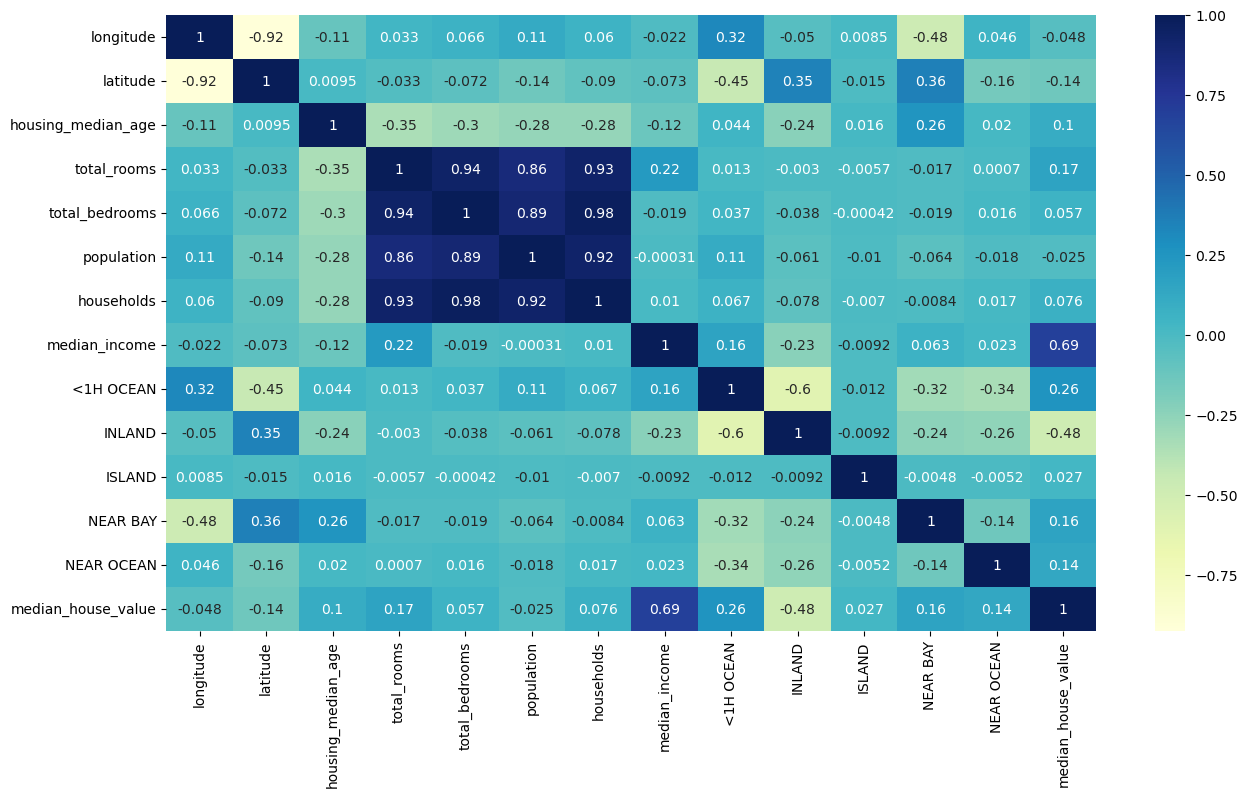

In [34]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [35]:
Scaler = StandardScaler()

In [36]:
X_train_scaler = Scaler.fit_transform(X_train)
X_test_scaler = Scaler.transform(X_test)
X_validate_scaler = Scaler.transform(X_validate)

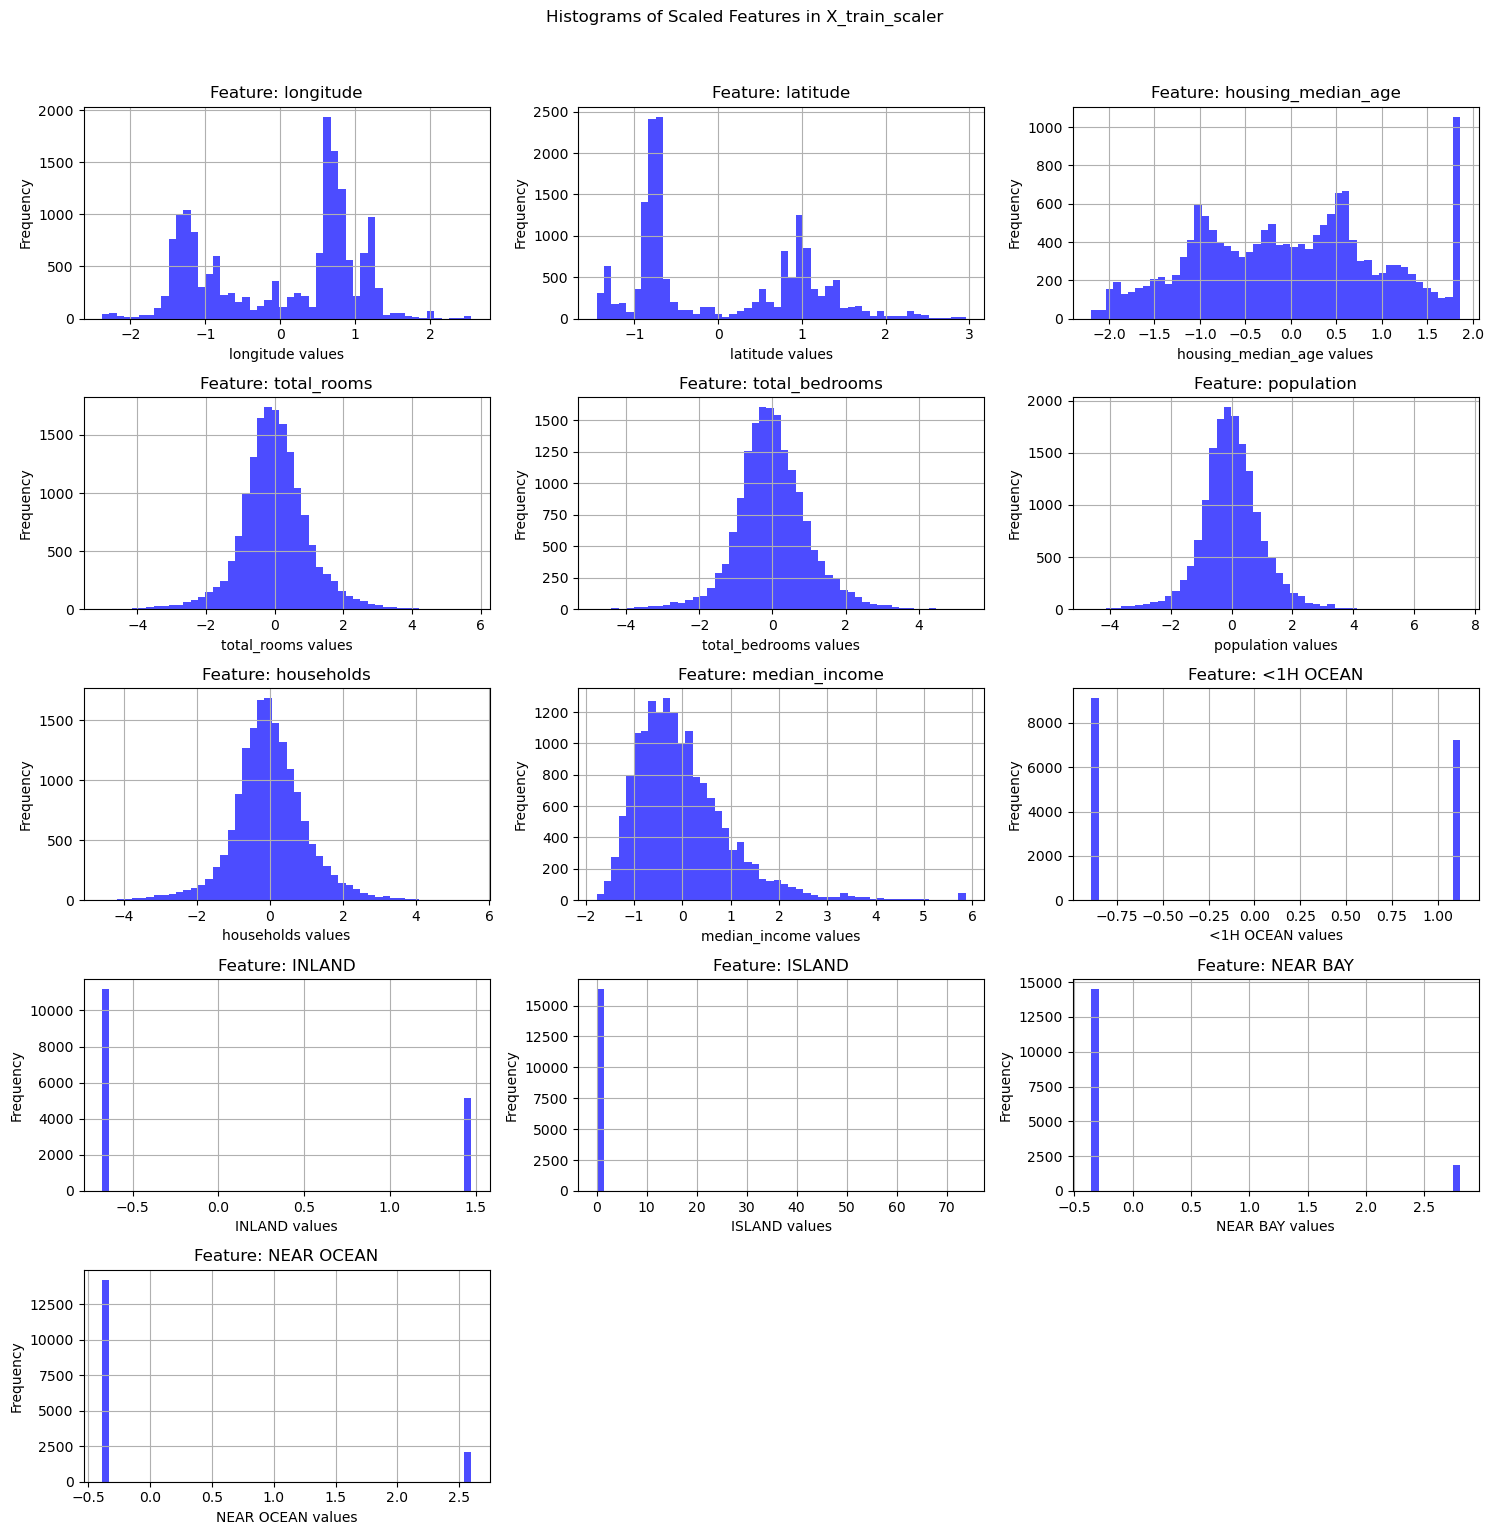

In [37]:
num_features = X_train_scaler.shape[1]
num_cols = 3  
num_rows = -(-num_features // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
fig.suptitle('Histograms of Scaled Features in X_train_scaler', y=1.02)

for i in range(num_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].hist(X_train_scaler[:, i], bins=50, color='blue', alpha=0.7)
    axes[row_idx, col_idx].set_title(f'Feature: {X.columns[i]}')
    axes[row_idx, col_idx].set_xlabel(f'{X.columns[i]} values')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].grid(True)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# End preprocess

In [70]:
for i in range(X_train_scaler.shape[1]):
    print({X.columns[i]})

{'longitude'}
{'latitude'}
{'housing_median_age'}
{'total_rooms'}
{'total_bedrooms'}
{'population'}
{'households'}
{'median_income'}
{'<1H OCEAN'}
{'INLAND'}
{'ISLAND'}
{'NEAR BAY'}
{'NEAR OCEAN'}


In [84]:
lasso_cv = LassoCV(cv = 10)
lasso_cv.fit(X_train_scaler, y_train)

LassoCV(cv=10)

In [85]:
print(lasso_cv.alpha_)

79.23547329574816


In [86]:
lasso_cv.coef_

array([-56875.36784431, -58780.73318343,  13351.97043939, -28691.88545561,
        65352.33567662, -61924.62672138,  28439.45544588,  78977.57099696,
         1011.25963692, -15282.21054495,   2476.01592689,  -2195.52851434,
            0.        ])

In [83]:
lasso_cv.score(X_validate_scaler, y_validate)

0.6826344235279423

## Linear Regression 

In [87]:
reg = LinearRegression()

In [88]:
reg.fit(X_train_scaler, y_train)

LinearRegression()

In [89]:
reg.score(X_validate_scaler, y_validate)

0.6824074055047504

In [90]:
reg_lasso = Lasso(max_iter=10000)
reg_ridge = Ridge()

In [91]:
reg_lasso.fit(X_train_scaler, y_train)

Lasso(max_iter=10000)

In [92]:
reg_ridge.fit(X_train_scaler, y_train)

Ridge()

In [93]:
reg_lasso.score(X_validate_scaler, y_validate)

0.6824110171810647

In [94]:
reg_lasso.coef_

array([-5.90970877e+04, -6.09877294e+04,  1.33899074e+04, -3.16191636e+04,
        6.82374774e+04, -6.28115264e+04,  2.92334216e+04,  7.97536853e+04,
        4.87694275e+03, -1.08817344e+04,  2.63917906e+03, -2.43791676e-02,
        2.50639736e+03])

In [95]:
reg_lasso.intercept_

206644.400097883

In [46]:
reg_ridge.score(X_validate_scaler, y_validate)

0.6824215518897303

In [47]:
reg_ridge.coef_

array([-58991.74438961, -60877.39866598,  13391.10422363, -31538.87347166,
        68091.58832625, -62794.20689409,  29285.91163217,  79730.25775242,
         6179.52782328,  -9699.35686297,   2676.6777175 ,    831.95702852,
         3393.26620557])

In [48]:
reg_ridge.intercept_

206644.400097883

In [49]:
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(reg_ridge, param_grid_ridge, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

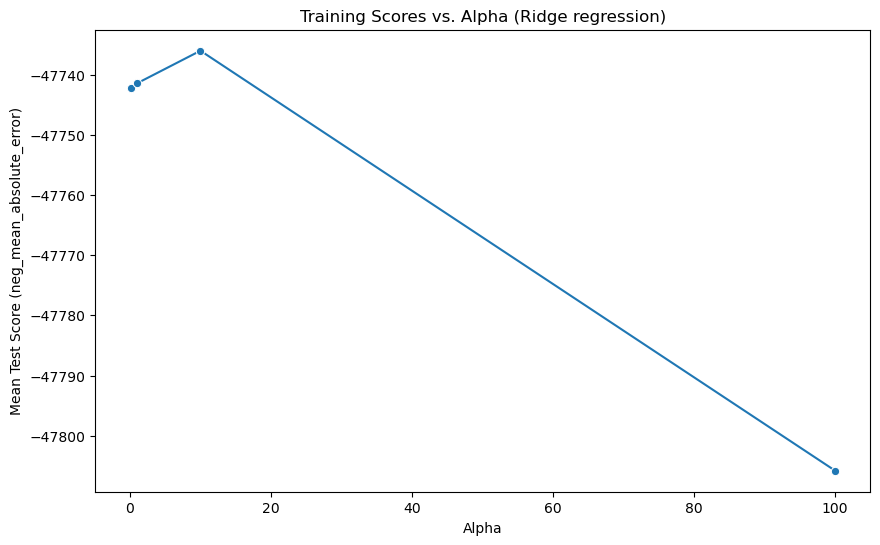

In [50]:
results = pd.DataFrame(grid_search_ridge.cv_results_)

param_cols = ['param_alpha', 'mean_test_score']
subset = results[param_cols].copy()  

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_alpha', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Alpha (Ridge regression)')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (neg_mean_absolute_error)')

plt.show()

In [51]:
grid_search_ridge.best_estimator_

Ridge(alpha=10)

In [52]:
best_ridge = grid_search_ridge.best_estimator_

In [53]:
best_ridge.score(X_validate_scaler, y_validate)

0.6825301971158554

## Random forest

In [38]:
forest = RandomForestRegressor()

In [39]:
forest.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [40]:
forest.score(X_validate_scaler, y_validate)

0.827533137948359

In [41]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_features" : [6, 10, 13],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 10, 13],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=200)

In [43]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=200)


In [44]:
best_forest = grid_search.best_estimator_

In [45]:
best_forest.score(X_validate_scaler, y_validate)

0.8280786742612153

## Neural network

In [40]:
nn = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver = 'adam',
                  max_iter=5000, random_state=42, learning_rate_init = 0.001)

nn.fit(X_train_scaler, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, random_state=42)

In [41]:
nn.score(X_validate_scaler, y_validate)

0.7889377868793123

In [ ]:
param_grid = {
    "activation" : ['relu', 'identity', 'tanh', 'logistic']
}

grid_search = GridSearchCV(nn, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

In [ ]:
nn_iden =  MLPRegressor(hidden_layer_sizes=(50, 50), activation='identity',
                  max_iter=5000, learning_rate_init=0.001, random_state=42)
nn_iden.fit(X_train_scaler, y_train)
nn_iden.score(X_validate_scaler, y_validate)

## KNN

In [38]:
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')

knn.fit(X_train_scaler, y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [39]:
knn.score(X_validate_scaler, y_validate)

0.7316256778747743

In [51]:
param_grid = {
    'n_neighbors': [8, 39, 40, 41, 50, 51, 52, 70, 71, 72, 100, 101, 102, 200, 300, 400, 500, 1000, 1500, 2000, 2500] 
}

In [52]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=4, weights='distance'),
             param_grid={'n_neighbors': [8, 39, 40, 41, 50, 51, 52, 70, 71, 72,
                                         100, 101, 102, 200, 300, 400, 500,
                                         1000, 1500, 2000, 2500]},
             scoring='neg_mean_absolute_error')

In [53]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=8, weights='distance')

In [54]:
best_knn = grid_search.best_estimator_

In [55]:
print(best_knn)

KNeighborsRegressor(n_neighbors=8, weights='distance')


In [56]:
best_knn.score(X_validate_scaler, y_validate)

0.7485789895290835

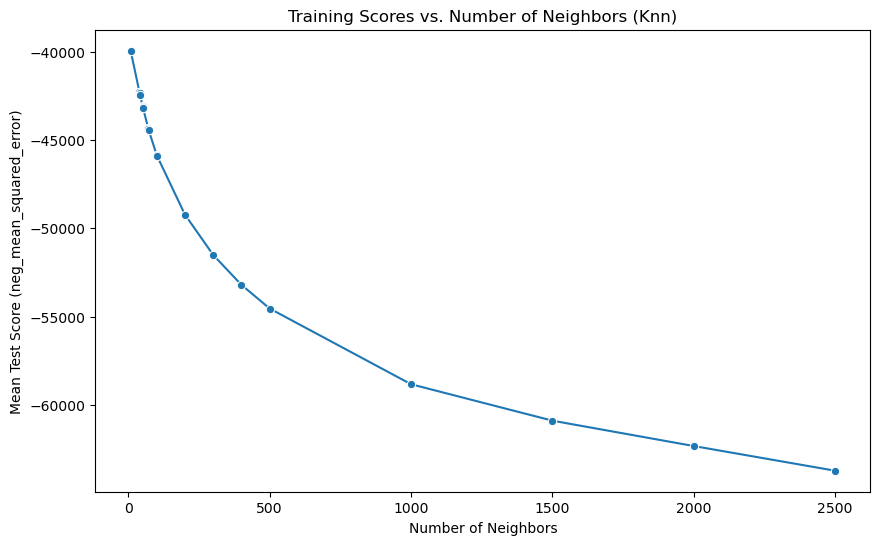

In [57]:
results = pd.DataFrame(grid_search.cv_results_)

param_cols = ['param_n_neighbors', 'mean_test_score']
subset = results[param_cols].copy()  

subset['param_n_neighbors'] = subset['param_n_neighbors'].astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Number of Neighbors (Knn)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score (neg_mean_squared_error)')

plt.show()

In [73]:
min_mean_test_score = results['mean_test_score'].min()
max_mean_test_score = results['mean_test_score'].max()

print(f'Min Mean Test Score: {min_mean_test_score}')
print(f'Max Mean Test Score: {max_mean_test_score}')


Min Mean Test Score: -40673.16086793538
Max Mean Test Score: -39924.59117002491


In [44]:
knn_changeMetric = KNeighborsRegressor(n_neighbors=8, weights='distance')

In [45]:
param_grid = {
    'metric': ['euclidean', 'manhattan','chebyshev', 'minkowski'] 
}

In [48]:
grid_search = GridSearchCV(knn_changeMetric, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaler, y_train)  

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=8, weights='distance'),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']},
             scoring='neg_mean_absolute_error')

In [49]:
grid_search.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')

In [50]:
best_knn_changeMetric = grid_search.best_estimator_
print(best_knn_changeMetric)

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')


In [51]:
best_knn_changeMetric.score(X_validate_scaler, y_validate)

0.7516721930559376

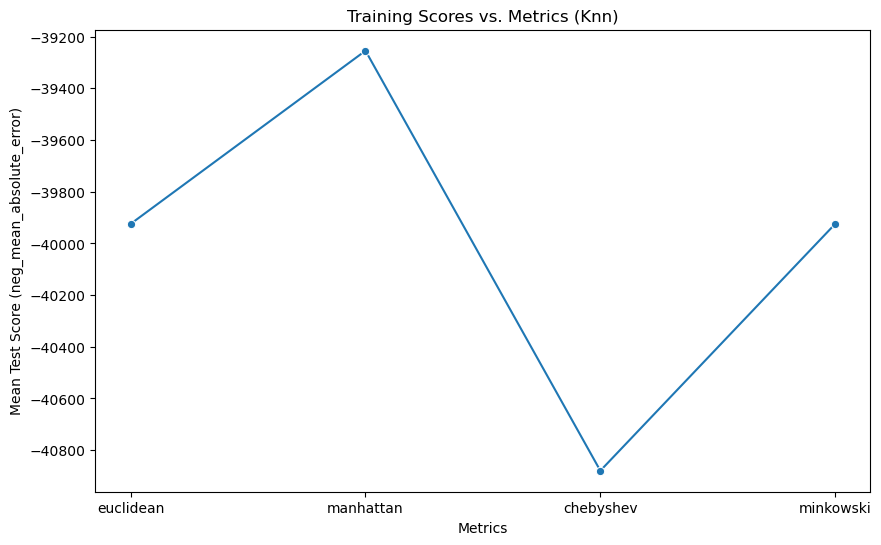

In [53]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_metric', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Metrics (Knn)')
plt.xlabel('Metrics')
plt.ylabel('Mean Test Score (neg_mean_absolute_error)')

plt.show()

## Predict on test set

In [74]:
best_ridge.predict(X_test_scaler)

array([252617.76573329, 276497.66092492, 123348.54912679, ...,
       246215.48700232, 120618.41090289, 177787.96686613])

In [75]:
best_forest.predict(X_test_scaler)

array([202792.04, 372078.11, 105059.  , ..., 276317.06, 103574.  ,
       100253.  ])

In [76]:
nn.predict(X_test_scaler)

array([199389.22944828, 344913.86136946,  99668.70220338, ...,
       259323.19141944, 153304.97578508,  99592.2095619 ])

In [77]:
best_knn.predict(X_test_scaler)

array([127986.51621699, 281176.76761233,  88977.54618983, ...,
       148662.37632542, 157722.69674435,  82254.67837296])

In [117]:
svr_best.predict(X_test_scaler)

array([196448.07320148, 209060.01771138, 120317.15265348, ...,
       191890.97965371, 141334.6481915 , 203773.16465844])

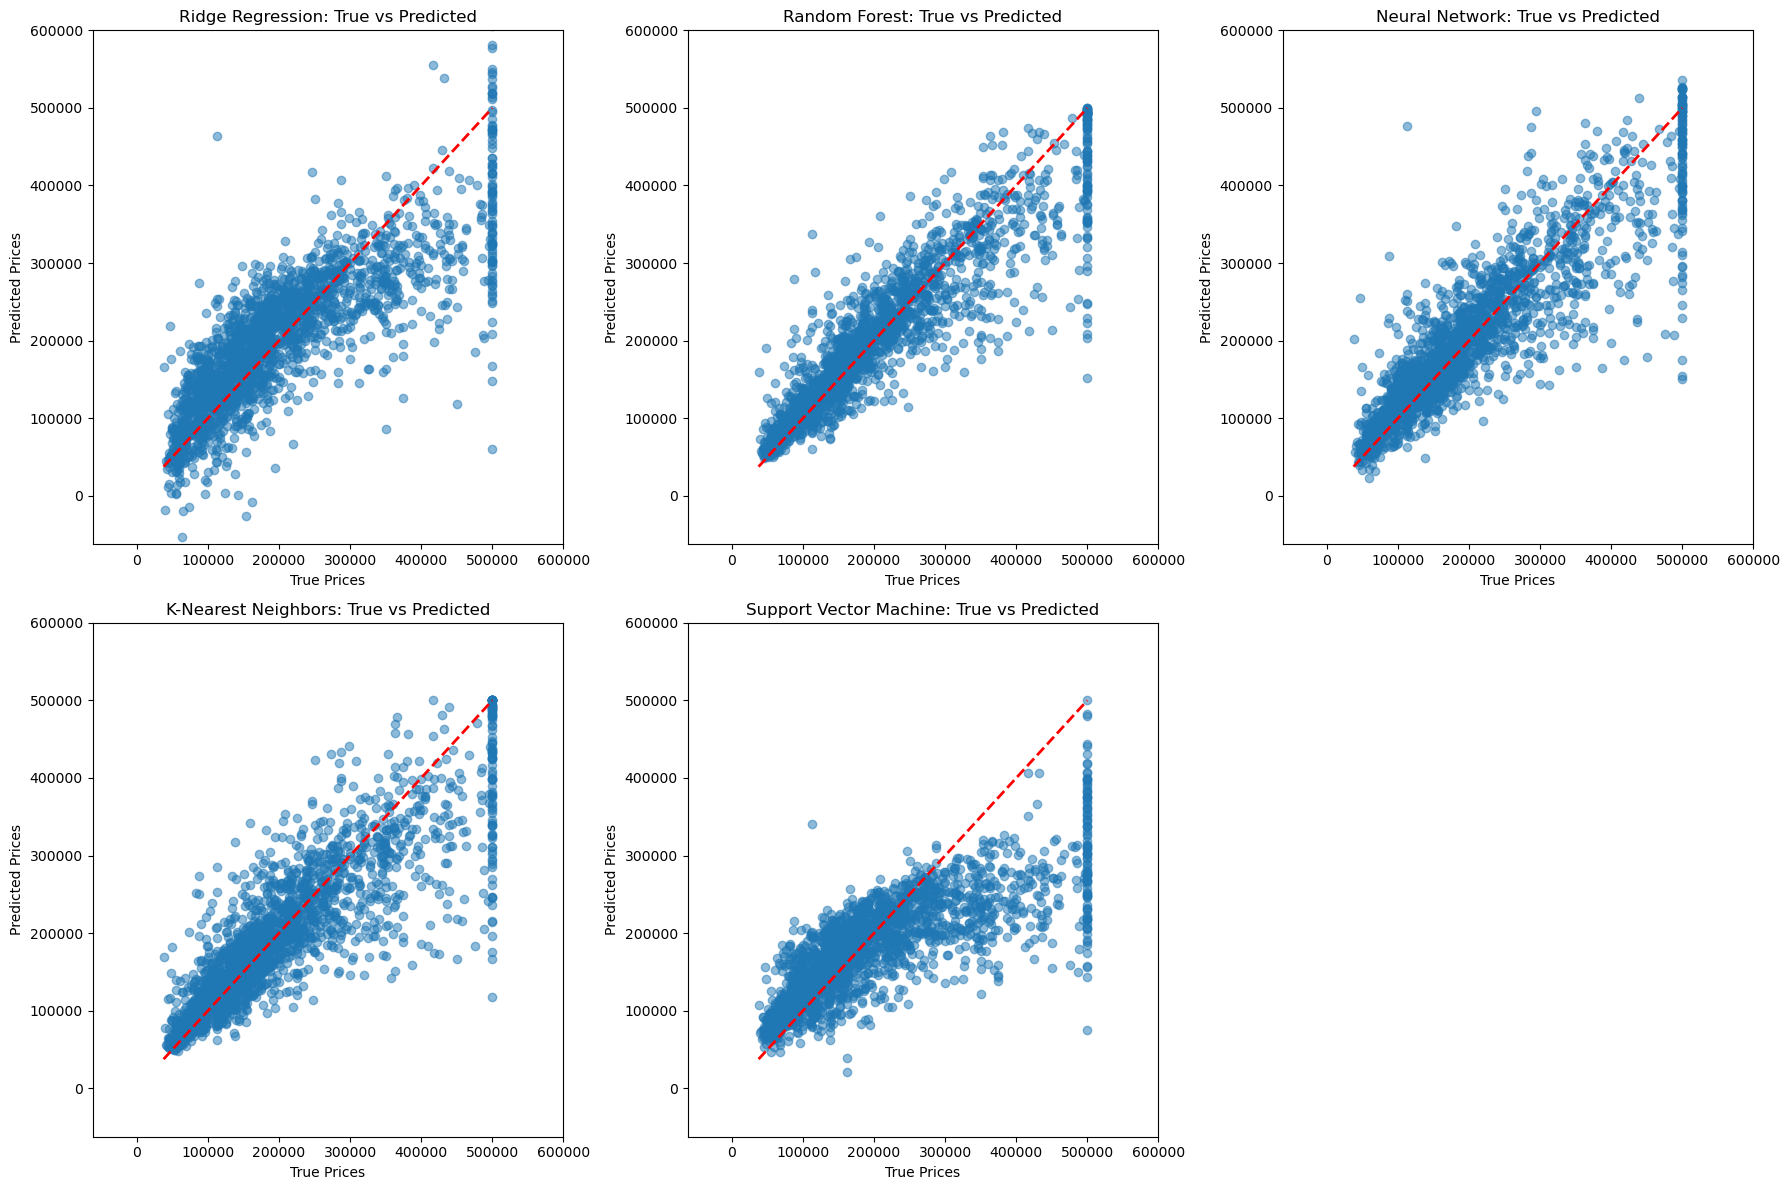

In [113]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(y_test, ridge_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Ridge Regression: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 2)
plt.scatter(y_test, forest_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 3)
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Neural Network: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 4)
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('K-Nearest Neighbors: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 5)
plt.scatter(y_test, svm_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Support Vector Machine: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.tight_layout()
plt.show()
